#### Import the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#### Read the dataset

In [3]:
df = pd.read_csv('E:/Imarticus_CF/Datasets/HeartDisease.csv')
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape
# rows = 303,cols=14

(303, 14)

### Data Preprocessing

#### 1) Handling Null values

In [5]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

#### 2) Handling Duplicates

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

#### 3) Check data types

In [8]:
df.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

#### 4) Target Variable

In [9]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

### EDA

#### Countplot for Target

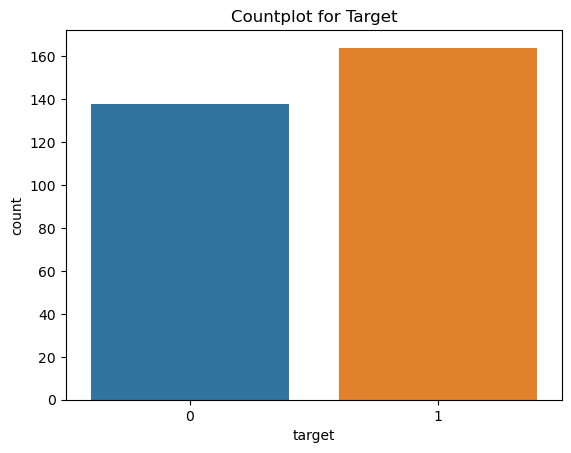

In [10]:
sns.countplot(x=df['target'])
plt.title('Countplot for Target')
plt.show()

In [11]:
df.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [12]:
df['gender'].value_counts()

1    206
0     96
Name: gender, dtype: int64

In [13]:
for i in df.columns:
    print(f'Feature {i}')
    print(df[i].nunique())

Feature age
41
Feature gender
2
Feature chest_pain
4
Feature rest_bps
49
Feature cholestrol
152
Feature fasting_blood_sugar
2
Feature rest_ecg
3
Feature thalach
91
Feature exer_angina
2
Feature old_peak
40
Feature slope
3
Feature ca
5
Feature thalassemia
4
Feature target
2


In [14]:
df.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [15]:
cont_feat = ['age','rest_bps','cholestrol','thalach','old_peak']
# cat_feat = ['gender','chest_pain','fasting_blood_sugar','rest_ecg','exer_angina',
#            'slope', 'ca', 'thalassemia']

In [16]:
cat_feat = [i for i in df.columns if i not in cont_feat]
print(cat_feat)

['gender', 'chest_pain', 'fasting_blood_sugar', 'rest_ecg', 'exer_angina', 'slope', 'ca', 'thalassemia', 'target']


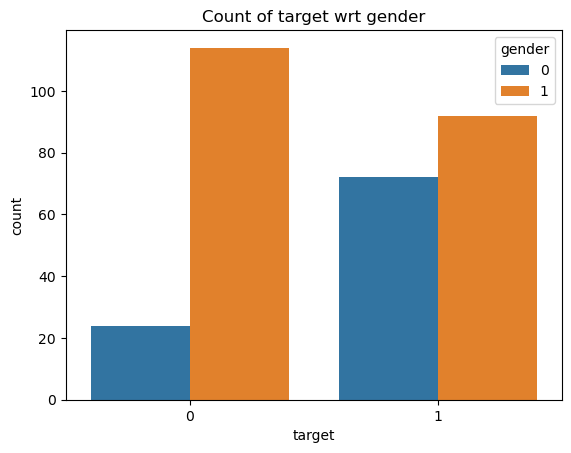

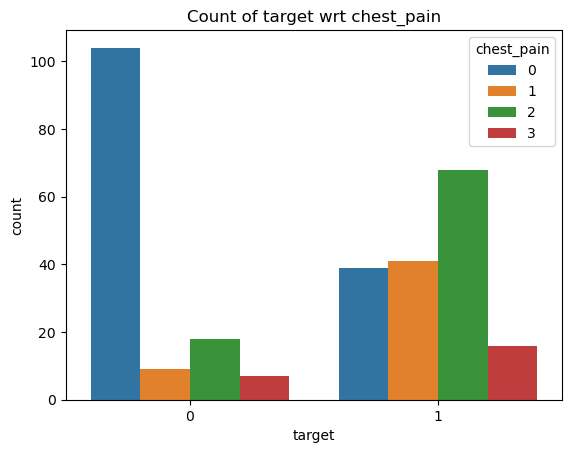

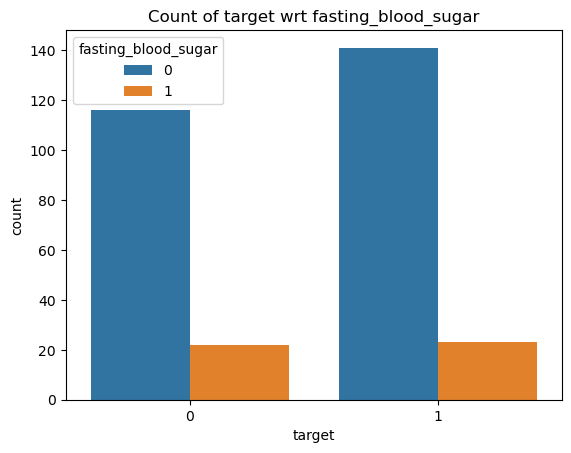

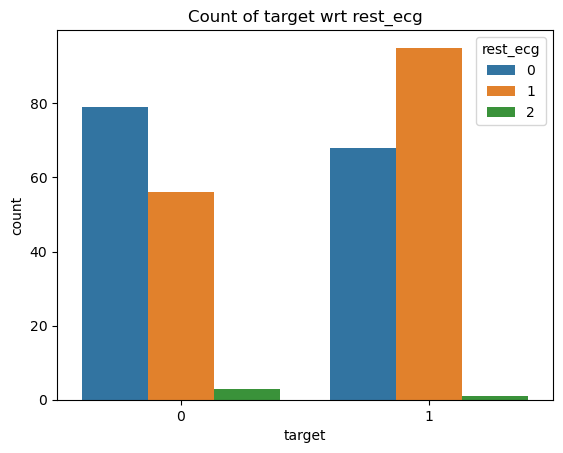

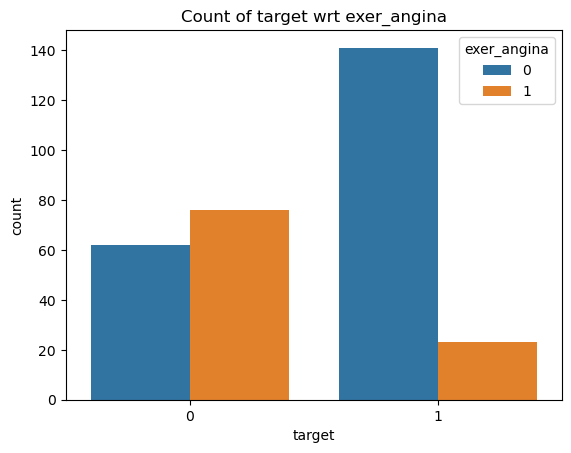

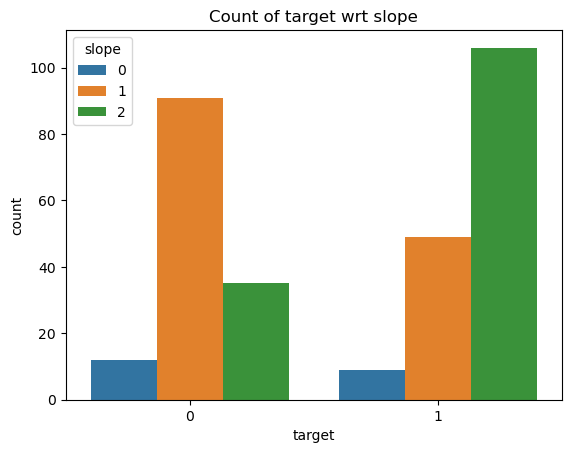

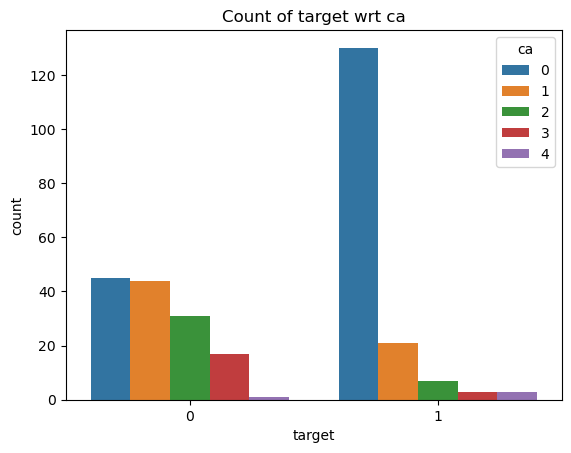

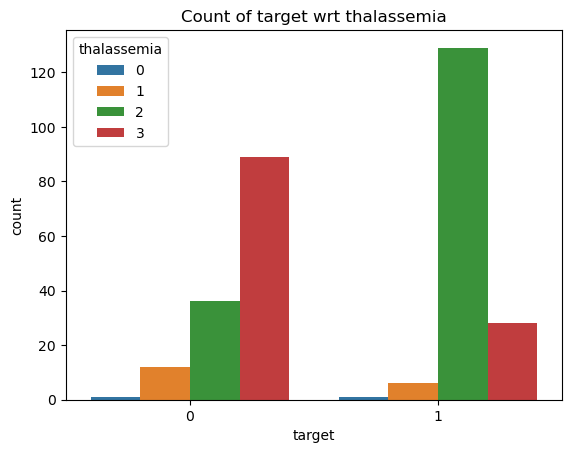

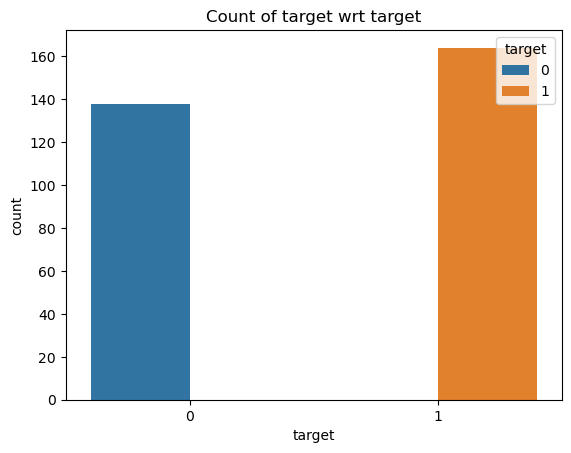

In [17]:
for i in cat_feat:
    sns.countplot(x=df['target'],hue=df[i])
    plt.title(f'Count of target wrt {i}')
    plt.show()

#### Inference
1) Female patients are more affected by heart disease.<br>
2) Chest Pain intensity 2 patients are more affected by heart disease.
etc

### Correlation

In [31]:
corr = df.corr()

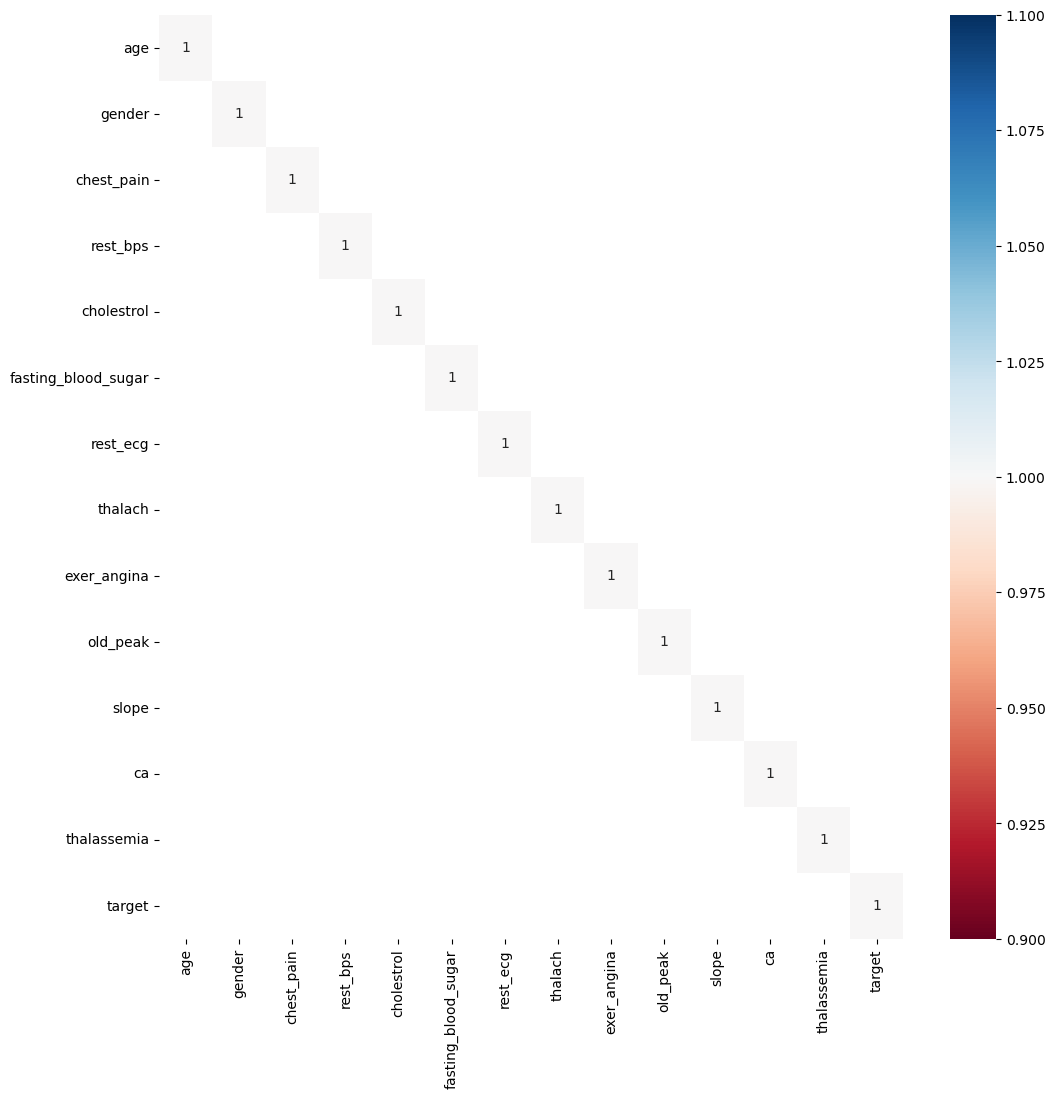

In [33]:
plt.figure(figsize=(12,12))
sns.heatmap(corr[abs(corr)>0.7],annot=True,cmap='RdBu')
plt.show()

#### Infernece
1) Features are not highly correlated.

#### Outlier Treatment

In [18]:
print(cont_feat)

['age', 'rest_bps', 'cholestrol', 'thalach', 'old_peak']


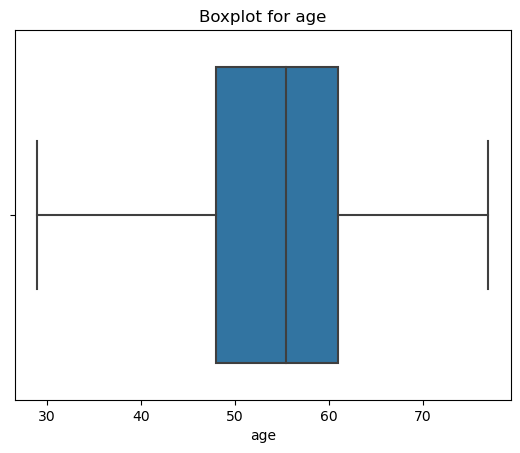

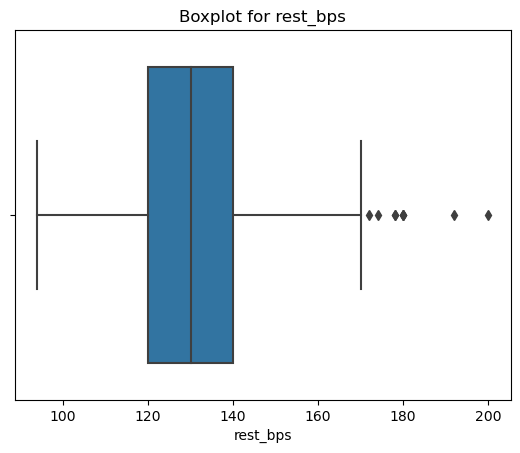

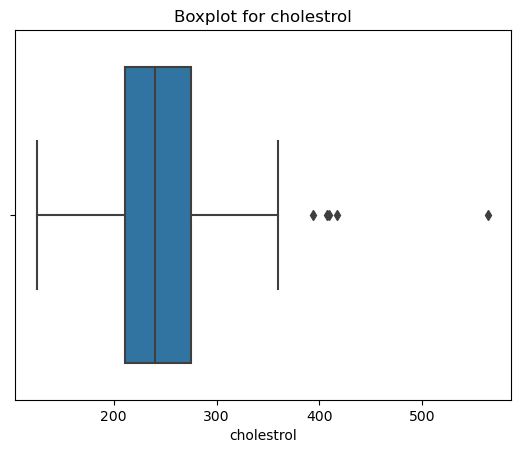

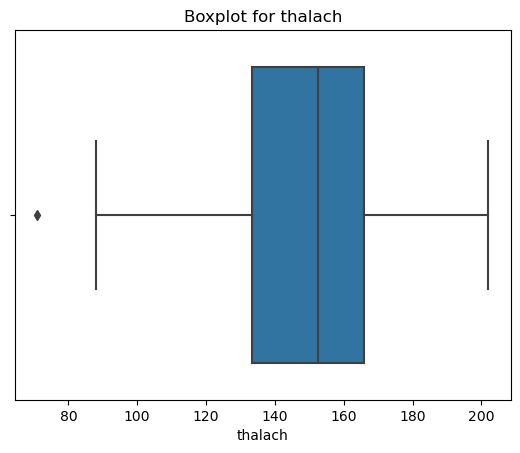

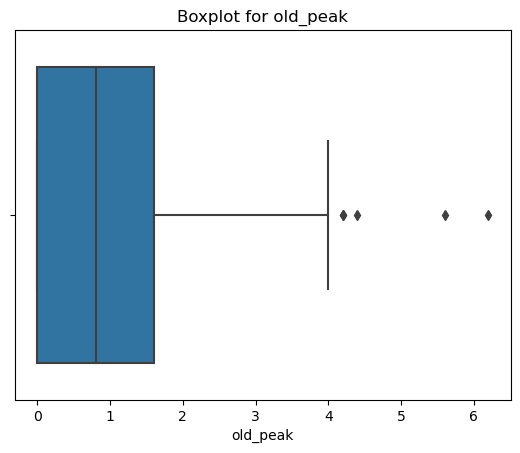

In [19]:
for i in cont_feat:
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [20]:
df[cont_feat].describe(percentiles=[0.95,0.97,0.98,0.99]).T

,count,mean,std,min,50%,95%,97%,98%,99%,max
age,302.0,54.420530,9.047970,29.0,55.5,68.00,69.97,70.00,71.00,77.0
rest_bps,302.0,131.602649,17.563394,94.0,130.0,160.00,170.00,177.92,180.00,200.0
cholestrol,302.0,246.500000,51.753489,126.0,240.5,326.95,340.97,353.98,406.87,564.0
thalach,302.0,149.569536,22.903527,71.0,152.5,181.95,184.97,186.98,191.98,202.0
old_peak,302.0,1.043046,1.161452,0.0,0.8,3.40,3.60,4.00,4.20,6.2


In [21]:
print(df[df['old_peak']>4.2].shape)
print(df[df['rest_bps']>170.00].shape)
print(df[df['cholestrol']>353.98].shape)

(3, 14)
(9, 14)
(7, 14)


In [41]:
# def outlier_treatment(x):
#     x = x.clip(upper=x.quantile(0.99))
#     return x

In [45]:
# x = int(input())
# res = np.where(x%2==0,'Even','Odd')
# print(res)

In [22]:
df['old_peak'] = np.where(df['old_peak']>4.2,4.2,df['old_peak'])
df['rest_bps'] = np.where(df['rest_bps']>170.00,170.00,df['rest_bps'])
df['cholestrol'] = np.where(df['cholestrol']>353.98,353.98,df['cholestrol'])

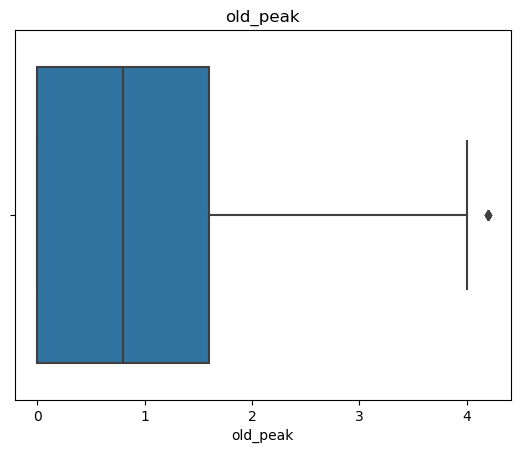

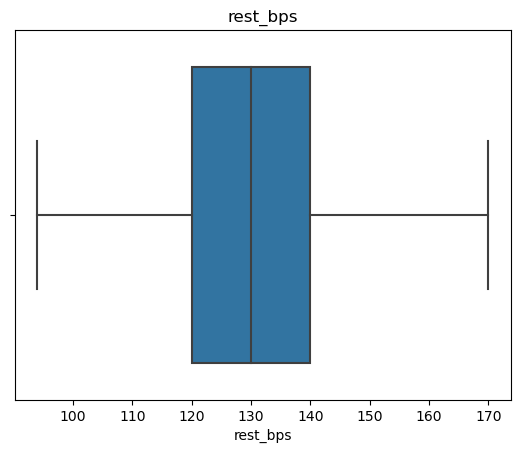

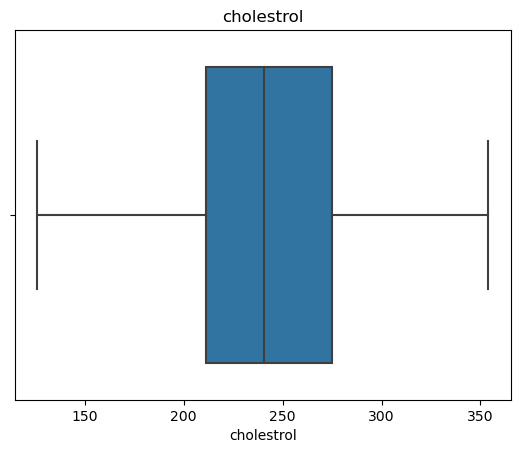

In [23]:
for i in ['old_peak','rest_bps','cholestrol']:
    sns.boxplot(x=df[i])
    plt.title(f'{i}')
    plt.show()

#### Select x and y

In [24]:
x = df.drop('target',axis=1)
y = df['target']
print(type(x),type(y))
print(x.shape,y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(302, 13) (302,)


#### Split data into train and test

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(211, 13)
(91, 13)
(211,)
(91,)


#### Creating Function Evaluate model performance

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [33]:
# def eval_model(ytest,ypred):
#     cm = confusion_matrix(ytest,ypred)
#     print(cm)
#     print('Acc Score',accuracy_score(ytest,ypred))
#     print(classification_report(ytest,ypred))
    
def mscore(model):
    print('Train Score',model.score(x_train,y_train))
    print('Test Score',model.score(x_test,y_test))

In [48]:
def eval_model(model,x_train,x_test,y_train,y_test,model_name):
    model.fit(x_train,y_train)
    train_scr = model.score(x_train,y_train)
    test_scr = model.score(x_test,y_test)
    ypred = model.predict(x_test)
    cm = confusion_matrix(y_test,ypred)
    print(cm)
    print('Acc Score',accuracy_score(y_test,ypred))
    print(classification_report(y_test,ypred))
    res = pd.DataFrame({'Train_Score':train_scr,'Test_Score':test_scr},index=[model_name])
    return res

#### Model Building

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_text

In [50]:
dt1 = DecisionTreeClassifier(criterion='gini')
dt1_res = eval_model(dt1,x_train,x_test,y_train,y_test,'DT1(gini)')
dt1_res

[[35  7]
 [10 39]]
Acc Score 0.8131868131868132
              precision    recall  f1-score   support

           0       0.78      0.83      0.80        42
           1       0.85      0.80      0.82        49

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



,Train_Score,Test_Score
DT1(gini),1.0,0.813187


In [45]:
dt1_res

,Train_Score,Test_Score
DT1(gini),1.0,0.813187


In [53]:
dt2 = DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_split=15)
dt2_res = eval_model(dt2,x_train,x_test,y_train,y_test,'DT2(gini,md,mss)')

[[34  8]
 [14 35]]
Acc Score 0.7582417582417582
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        42
           1       0.81      0.71      0.76        49

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.76      0.76        91



In [54]:
dt2_res

,Train_Score,Test_Score
"DT2(gini,md,mss)",0.886256,0.758242


#### Cross Validation for Max_Depth

In [55]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold

In [56]:
kf_cv = KFold(n_splits=5,shuffle=True)
dt = DecisionTreeClassifier(criterion='gini')
max_depth_range = list(range(7,13))  # 7,8,9,10,11,12
for i in max_depth_range:
    score = cross_val_score(dt, x,y,cv=kf_cv,scoring='accuracy')
    print(f'Score for max_depth {i} is {score}')
    print(f'Mean Score max_depth {i} is {score.mean()}')

Score for max_depth 7 is [0.81967213 0.75409836 0.75       0.76666667 0.71666667]
Mean Score max_depth 7 is 0.7614207650273224
Score for max_depth 8 is [0.75409836 0.78688525 0.81666667 0.66666667 0.58333333]
Mean Score max_depth 8 is 0.7215300546448088
Score for max_depth 9 is [0.72131148 0.73770492 0.73333333 0.75       0.73333333]
Mean Score max_depth 9 is 0.735136612021858
Score for max_depth 10 is [0.70491803 0.75409836 0.7        0.76666667 0.66666667]
Mean Score max_depth 10 is 0.7184699453551912
Score for max_depth 11 is [0.62295082 0.70491803 0.68333333 0.71666667 0.73333333]
Mean Score max_depth 11 is 0.69224043715847
Score for max_depth 12 is [0.73770492 0.73770492 0.7        0.8        0.76666667]
Mean Score max_depth 12 is 0.7484153005464481


#### Cross Validation for Min_Samples_Split

In [57]:
kf_cv = KFold(n_splits=5,shuffle=True)
dt = DecisionTreeClassifier(criterion='gini')
mss_range = list(range(8,20,2))  # 8,10,12,....,18
for i in mss_range:
    score = cross_val_score(dt, x,y,cv=kf_cv,scoring='accuracy')
    print(f'Score for min_samples_split {i} is {score}')
    print(f'Mean Score min_samples_split {i} is {score.mean()}')

Score for min_samples_split 8 is [0.78688525 0.7704918  0.66666667 0.8        0.73333333]
Mean Score min_samples_split 8 is 0.7514754098360656
Score for min_samples_split 10 is [0.75409836 0.75409836 0.76666667 0.73333333 0.75      ]
Mean Score min_samples_split 10 is 0.7516393442622951
Score for min_samples_split 12 is [0.72131148 0.86885246 0.66666667 0.66666667 0.8       ]
Mean Score min_samples_split 12 is 0.7446994535519126
Score for min_samples_split 14 is [0.70491803 0.78688525 0.85       0.6        0.71666667]
Mean Score min_samples_split 14 is 0.7316939890710383
Score for min_samples_split 16 is [0.75409836 0.78688525 0.75       0.83333333 0.73333333]
Mean Score min_samples_split 16 is 0.7715300546448087
Score for min_samples_split 18 is [0.83606557 0.75409836 0.68333333 0.81666667 0.66666667]
Mean Score min_samples_split 18 is 0.7513661202185792


### Hyperparameter Tuning Techniques

#### GridSearchCV
1) Searches for all possible permutations and combination of hyperparameters and then generates the best hyperparameters.<br>
2) High time complexity<br>

#### RandomizedSarchCV
1) Searches for some random combinations of hyperparameters and then generates the best parameters from amongst the randomly chosen combinations.<br>
2) Low time complexity<br>


In [83]:
hparams = {'criterion':['gini','entropy'],
          'max_depth':[8,9,10,11,12,14],
          'min_samples_split':[8,10,12,14,15,16,20]}

In [84]:
dt_base = DecisionTreeClassifier()
gscv = GridSearchCV(dt_base,param_grid=hparams,scoring='accuracy')  # cv=5
gscv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 9, 10, 11, 12, 14],
                         'min_samples_split': [8, 10, 12, 14, 15, 16, 20]},
             scoring='accuracy')

In [85]:
print(gscv.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 10}


In [87]:
gscv1_res = pd.DataFrame(gscv.cv_results_)
gscv1_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003399,0.000496,0.002605,0.000494,gini,8,8,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.790698,0.785714,0.714286,0.785714,0.785714,0.772425,0.029134,44
1,0.003793,0.000397,0.002798,0.001165,gini,8,10,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.790698,0.785714,0.714286,0.833333,0.785714,0.781949,0.038272,9
2,0.004594,0.002870,0.002199,0.000748,gini,8,12,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.767442,0.761905,0.714286,0.833333,0.785714,0.772536,0.038476,39
3,0.002798,0.000399,0.001799,0.000749,gini,8,14,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.790698,0.809524,0.714286,0.833333,0.761905,0.781949,0.041127,9
4,0.003598,0.000799,0.002398,0.001497,gini,8,15,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.767442,0.809524,0.714286,0.833333,0.761905,0.777298,0.041190,17


In [88]:
gscv1_res.shape

(84, 16)

In [89]:
gscv1_res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [94]:
comp1 = gscv1_res[['params', 'mean_test_score','rank_test_score']]
comp1.sort_values('rank_test_score',ascending=True,inplace=True)
comp1

C:\Users\Dell\AppData\Local\Temp\ipykernel_4732\3123731538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp1.sort_values('rank_test_score',ascending=True,inplace=True)


,params,mean_test_score,rank_test_score
50,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.791473,1
64,"{'criterion': 'entropy', 'max_depth': 11, 'min...",0.786822,2
44,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.786711,3
78,"{'criterion': 'entropy', 'max_depth': 14, 'min...",0.786711,3
51,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.786711,3
...,...,...,...
55,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.748837,79
76,"{'criterion': 'entropy', 'max_depth': 12, 'min...",0.748837,79
48,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.748837,79
69,"{'criterion': 'entropy', 'max_depth': 11, 'min...",0.748837,79


In [100]:
print(gscv.best_params_)
print(gscv.best_estimator_)
print(gscv.best_index_)
print(gscv.best_score_)

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 10}
DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10)
50
0.7914728682170542


In [97]:
print(gscv.score(x_train,y_train))
print(gscv.score(x_test,y_test))

0.909952606635071
0.7252747252747253


#### args and kwargs

In [ ]:
# args - *, used with list or tuple
# kwargs - **, used with dict

In [108]:
def sum_n(*x):
    tot = 0
    for i in x:   # destructuring
        tot += i
    print(tot)
    
sum_n(2,3)
sum_n()
sum_n(2,3,5,7,8,9,12,14,13)
sum_n(2,3,5,7)

5
0
73
17


In [109]:
w1 = [5,6,7,8]
w2 = [10,20,40,w1,50]
w3 = [10,20,40,*w1,50]
print(w2)
print(w3)

[10, 20, 40, [5, 6, 7, 8], 50]
[10, 20, 40, 5, 6, 7, 8, 50]


In [119]:
def f1(**n):
    print(n)
    
f1(name='Ankit',age=22)
f1(age=22,city='Delhi',name='Ankit')

{'name': 'Ankit', 'age': 22}
{'age': 22, 'city': 'Delhi', 'name': 'Ankit'}


In [118]:
def prod(a,b):
    print(a*b)

prod(5,7)

35


In [121]:
w1 = {'a1':10,'a2':20}
w2 = {'k1':5,'k2':7,'k3':w1}
w3 = {'k1':5,'k2':7,**w1}
print(w2)
print(w3)

{'k1': 5, 'k2': 7, 'k3': {'a1': 10, 'a2': 20}}
{'k1': 5, 'k2': 7, 'a1': 10, 'a2': 20}


In [ ]:
#### ** kwargs - keyword args

In [110]:
final_dt = DecisionTreeClassifier(**gscv.best_params_)
final_res = eval_model(dt1,x_train,x_test,y_train,y_test,'GS_Best_params')
final_res

[[36  6]
 [10 39]]
Acc Score 0.8241758241758241
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        42
           1       0.87      0.80      0.83        49

    accuracy                           0.82        91
   macro avg       0.82      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91



,Train_Score,Test_Score
GS_Best_params,1.0,0.824176


#### Randomized Search CV

In [122]:
hparams = {'criterion':['gini','entropy'],
          'max_depth':[8,9,10,11,12,14],
          'min_samples_split':[8,10,12,14,15,16,20]}

In [133]:
dt_base1 = DecisionTreeClassifier()
rscv = RandomizedSearchCV(dt_base1,param_distributions=hparams,scoring='accuracy',n_iter=20)  # cv=5
rscv.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [8, 9, 10, 11, 12, 14],
                                        'min_samples_split': [8, 10, 12, 14, 15,
                                                              16, 20]},
                   scoring='accuracy')

In [134]:
rscv_res = pd.DataFrame(rscv.cv_results_)
rscv_res.shape

(20, 16)

In [135]:
rscv_res[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'min_samples_split': 10, 'max_depth': 9, 'cri...",0.777187,6
1,"{'min_samples_split': 8, 'max_depth': 8, 'crit...",0.777298,5
2,"{'min_samples_split': 8, 'max_depth': 12, 'cri...",0.758250,19
3,"{'min_samples_split': 15, 'max_depth': 11, 'cr...",0.772425,14
4,"{'min_samples_split': 10, 'max_depth': 14, 'cr...",0.782060,2
5,"{'min_samples_split': 14, 'max_depth': 9, 'cri...",0.767663,16
6,"{'min_samples_split': 15, 'max_depth': 8, 'cri...",0.777187,6
7,"{'min_samples_split': 16, 'max_depth': 12, 'cr...",0.772647,11
8,"{'min_samples_split': 15, 'max_depth': 10, 'cr...",0.763123,18
9,"{'min_samples_split': 10, 'max_depth': 11, 'cr...",0.782171,1


In [136]:
print(rscv.best_params_)
print(rscv.best_estimator_)
print(rscv.best_index_)
print(rscv.best_score_)

{'min_samples_split': 10, 'max_depth': 11, 'criterion': 'entropy'}
DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=10)
9
0.7821705426356589


In [137]:
dt_res = pd.concat([dt1_res,dt2_res,final_res])
dt_res

,Train_Score,Test_Score
DT1(gini),1.000000,0.813187
"DT2(gini,md,mss)",0.886256,0.758242
GS_Best_params,1.000000,0.824176
